In [187]:
import pandas as pd

sales_with_rarity = pd.read_csv('sales_with_rarity.csv')

days = 1

# Convert the 'timestamp' from Unix epoch to datetime
sales_with_rarity['date'] = pd.to_datetime(sales_with_rarity['timestamp'], unit='ns').dt.date

sales_with_rarity['price'] = sales_with_rarity['price']/1000000
# Group by 'collection' and 'date' to find the minimum price (floor price) for each day
floor_prices = sales_with_rarity.groupby(['collection', 'date'])['price'].min().reset_index()

# Rename the 'price' column to 'floor_price' in the floor_prices DataFrame
floor_prices.rename(columns={'price': 'floor_price'}, inplace=True)

# Calculate the 7-day rolling average of the floor prices for each collection
floor_prices[f'{days}_day_rolling_avg_floor_price'] = floor_prices.groupby('collection')['floor_price'].transform(lambda x: x.rolling(window=days).mean())

# Merge the 7-day rolling average floor price back into the original DataFrame
sales_with_rarity = pd.merge(sales_with_rarity, floor_prices[['collection', 'date', f'{days}_day_rolling_avg_floor_price']], on=['collection', 'date'], how='left')

In [188]:
floor_prices

,collection,date,floor_price,1_day_rolling_avg_floor_price
0,3bqt5-gyaaa-aaaah-qcvha-cai,2022-03-03,50.0,50.0
1,3bqt5-gyaaa-aaaah-qcvha-cai,2022-03-04,120.0,120.0
2,3bqt5-gyaaa-aaaah-qcvha-cai,2022-03-05,133.0,133.0
3,3bqt5-gyaaa-aaaah-qcvha-cai,2022-03-06,100.0,100.0
4,3bqt5-gyaaa-aaaah-qcvha-cai,2022-03-07,150.0,150.0
...,...,...,...,...
5945,zvycl-fyaaa-aaaah-qckmq-cai,2023-10-20,39.0,39.0
5946,zvycl-fyaaa-aaaah-qckmq-cai,2023-10-21,39.0,39.0
5947,zvycl-fyaaa-aaaah-qckmq-cai,2023-10-24,39.0,39.0
5948,zvycl-fyaaa-aaaah-qckmq-cai,2023-10-25,149.0,149.0


<Axes: >

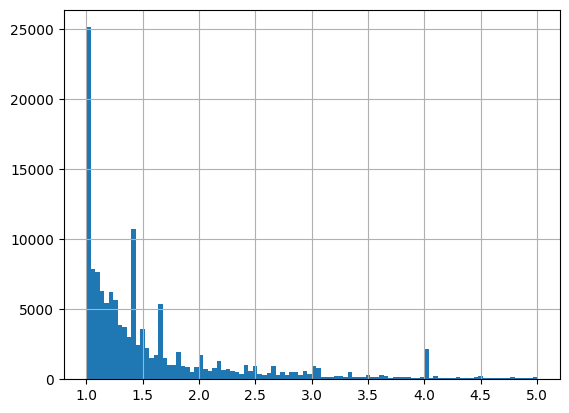

In [189]:
res = (sales_with_rarity.price/(sales_with_rarity[f'{days}_day_rolling_avg_floor_price']))
res[res<5].hist(bins=100)

In [190]:
sales_with_rarity['times_above_floor'] = (sales_with_rarity.price/(sales_with_rarity[f'{days}_day_rolling_avg_floor_price']))

In [191]:
sales_with_rarity.times_above_floor.mean(), sales_with_rarity.times_above_floor.median()

(5.708349407592034, 1.4285714285714286)

In [192]:
for col in sales_with_rarity.collection.unique():
    sales = sales_with_rarity[sales_with_rarity.collection ==col]
    print(len(sales), round(sales.times_above_floor.mean(),2), round(sales.times_above_floor.median(),2))

19360 3.38 1.49
16294 2.38 1.26
10448 11.51 2.72
1616 2.06 1.08
9480 2.11 1.67
11126 9.42 1.5
21320 2.16 1.43
1962 2.99 1.18
21878 8.39 1.4
760 1.32 1.1
1063 1.56 1.06
4605 2.41 1.1
10354 2.57 1.38
8170 27.0 1.87
5648 1.67 1.18
15565 3.4 1.69


<Axes: >

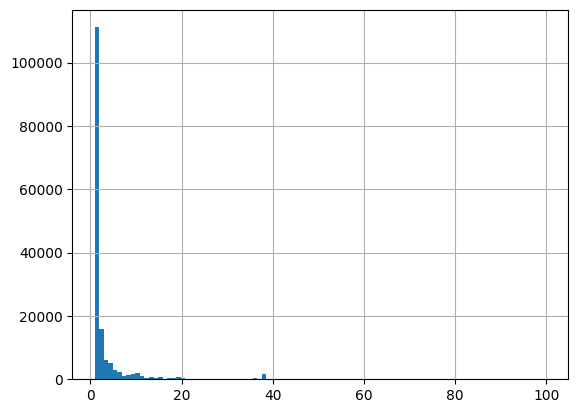

In [122]:
res = (sales_with_rarity.price/(sales_with_rarity[f'{days}_day_rolling_avg_floor_price']))
res[res<100].hist(bins=100)

In [57]:
sales_with_rarity.price.min()

1000000

In [88]:
sales_with_rarity[[ 'price', '7_day_rolling_avg_floor_price']]/1000000

,price,7_day_rolling_avg_floor_price
0,150.0,NaN
1,150.0,NaN
2,180.0,94.571428
3,180.0,94.571428
4,240.0,138.427143
...,...,...
159644,265.0,198.000000
159645,280.0,115.714286
159646,120.0,NaN
159647,200.0,128.142857


/var/folders/vs/v2spybcx4wz_xfk2dbj37g0c0000gn/T/ipykernel_85918/49037.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  floor_prices.groupby('date').mean()['7_day_rolling_avg_floor_price'].plot()


<Axes: xlabel='date'>

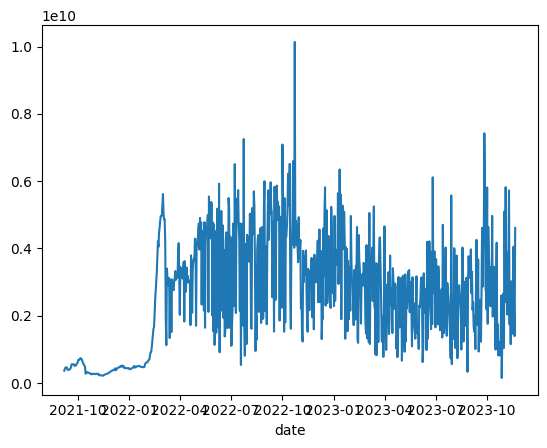

In [89]:
floor_prices.groupby('date').mean()['7_day_rolling_avg_floor_price'].plot()

/var/folders/vs/v2spybcx4wz_xfk2dbj37g0c0000gn/T/ipykernel_85918/49037.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  floor_prices.groupby('date').mean()['7_day_rolling_avg_floor_price'].plot()


<Axes: xlabel='date'>

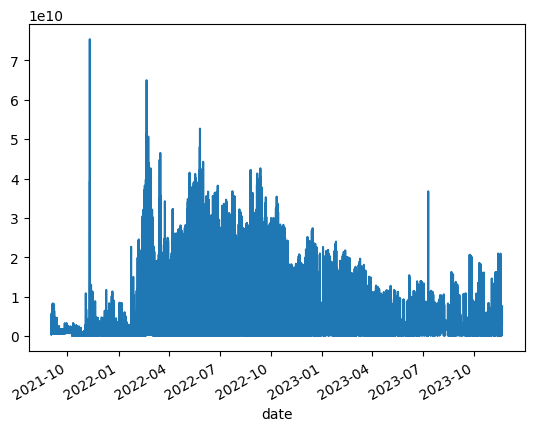

In [50]:
floor_prices.groupby('date').mean()['7_day_rolling_avg_floor_price'].plot()

,collection,date,floor_price,7_day_rolling_avg_floor_price
0,3bqt5-gyaaa-aaaah-qcvha-cai,2022-03-03 15:00:23.298639066,1900000000,NaN
1,3bqt5-gyaaa-aaaah-qcvha-cai,2022-03-03 15:00:26.172895355,200000000,NaN
2,3bqt5-gyaaa-aaaah-qcvha-cai,2022-03-03 15:00:27.818709961,200000000,NaN
3,3bqt5-gyaaa-aaaah-qcvha-cai,2022-03-03 15:00:30.588494049,200000000,6.250000e+08
4,3bqt5-gyaaa-aaaah-qcvha-cai,2022-03-03 15:00:34.988024462,200000000,2.000000e+08
...,...,...,...,...
3895,3bqt5-gyaaa-aaaah-qcvha-cai,2023-11-06 00:39:33.605793152,38000000,8.450000e+07
3896,3bqt5-gyaaa-aaaah-qcvha-cai,2023-11-06 00:40:10.892957314,38000000,4.400000e+07
3897,3bqt5-gyaaa-aaaah-qcvha-cai,2023-11-06 00:41:06.809677676,57999999,4.600000e+07
3898,3bqt5-gyaaa-aaaah-qcvha-cai,2023-11-06 00:41:39.154794836,57999999,4.800000e+07


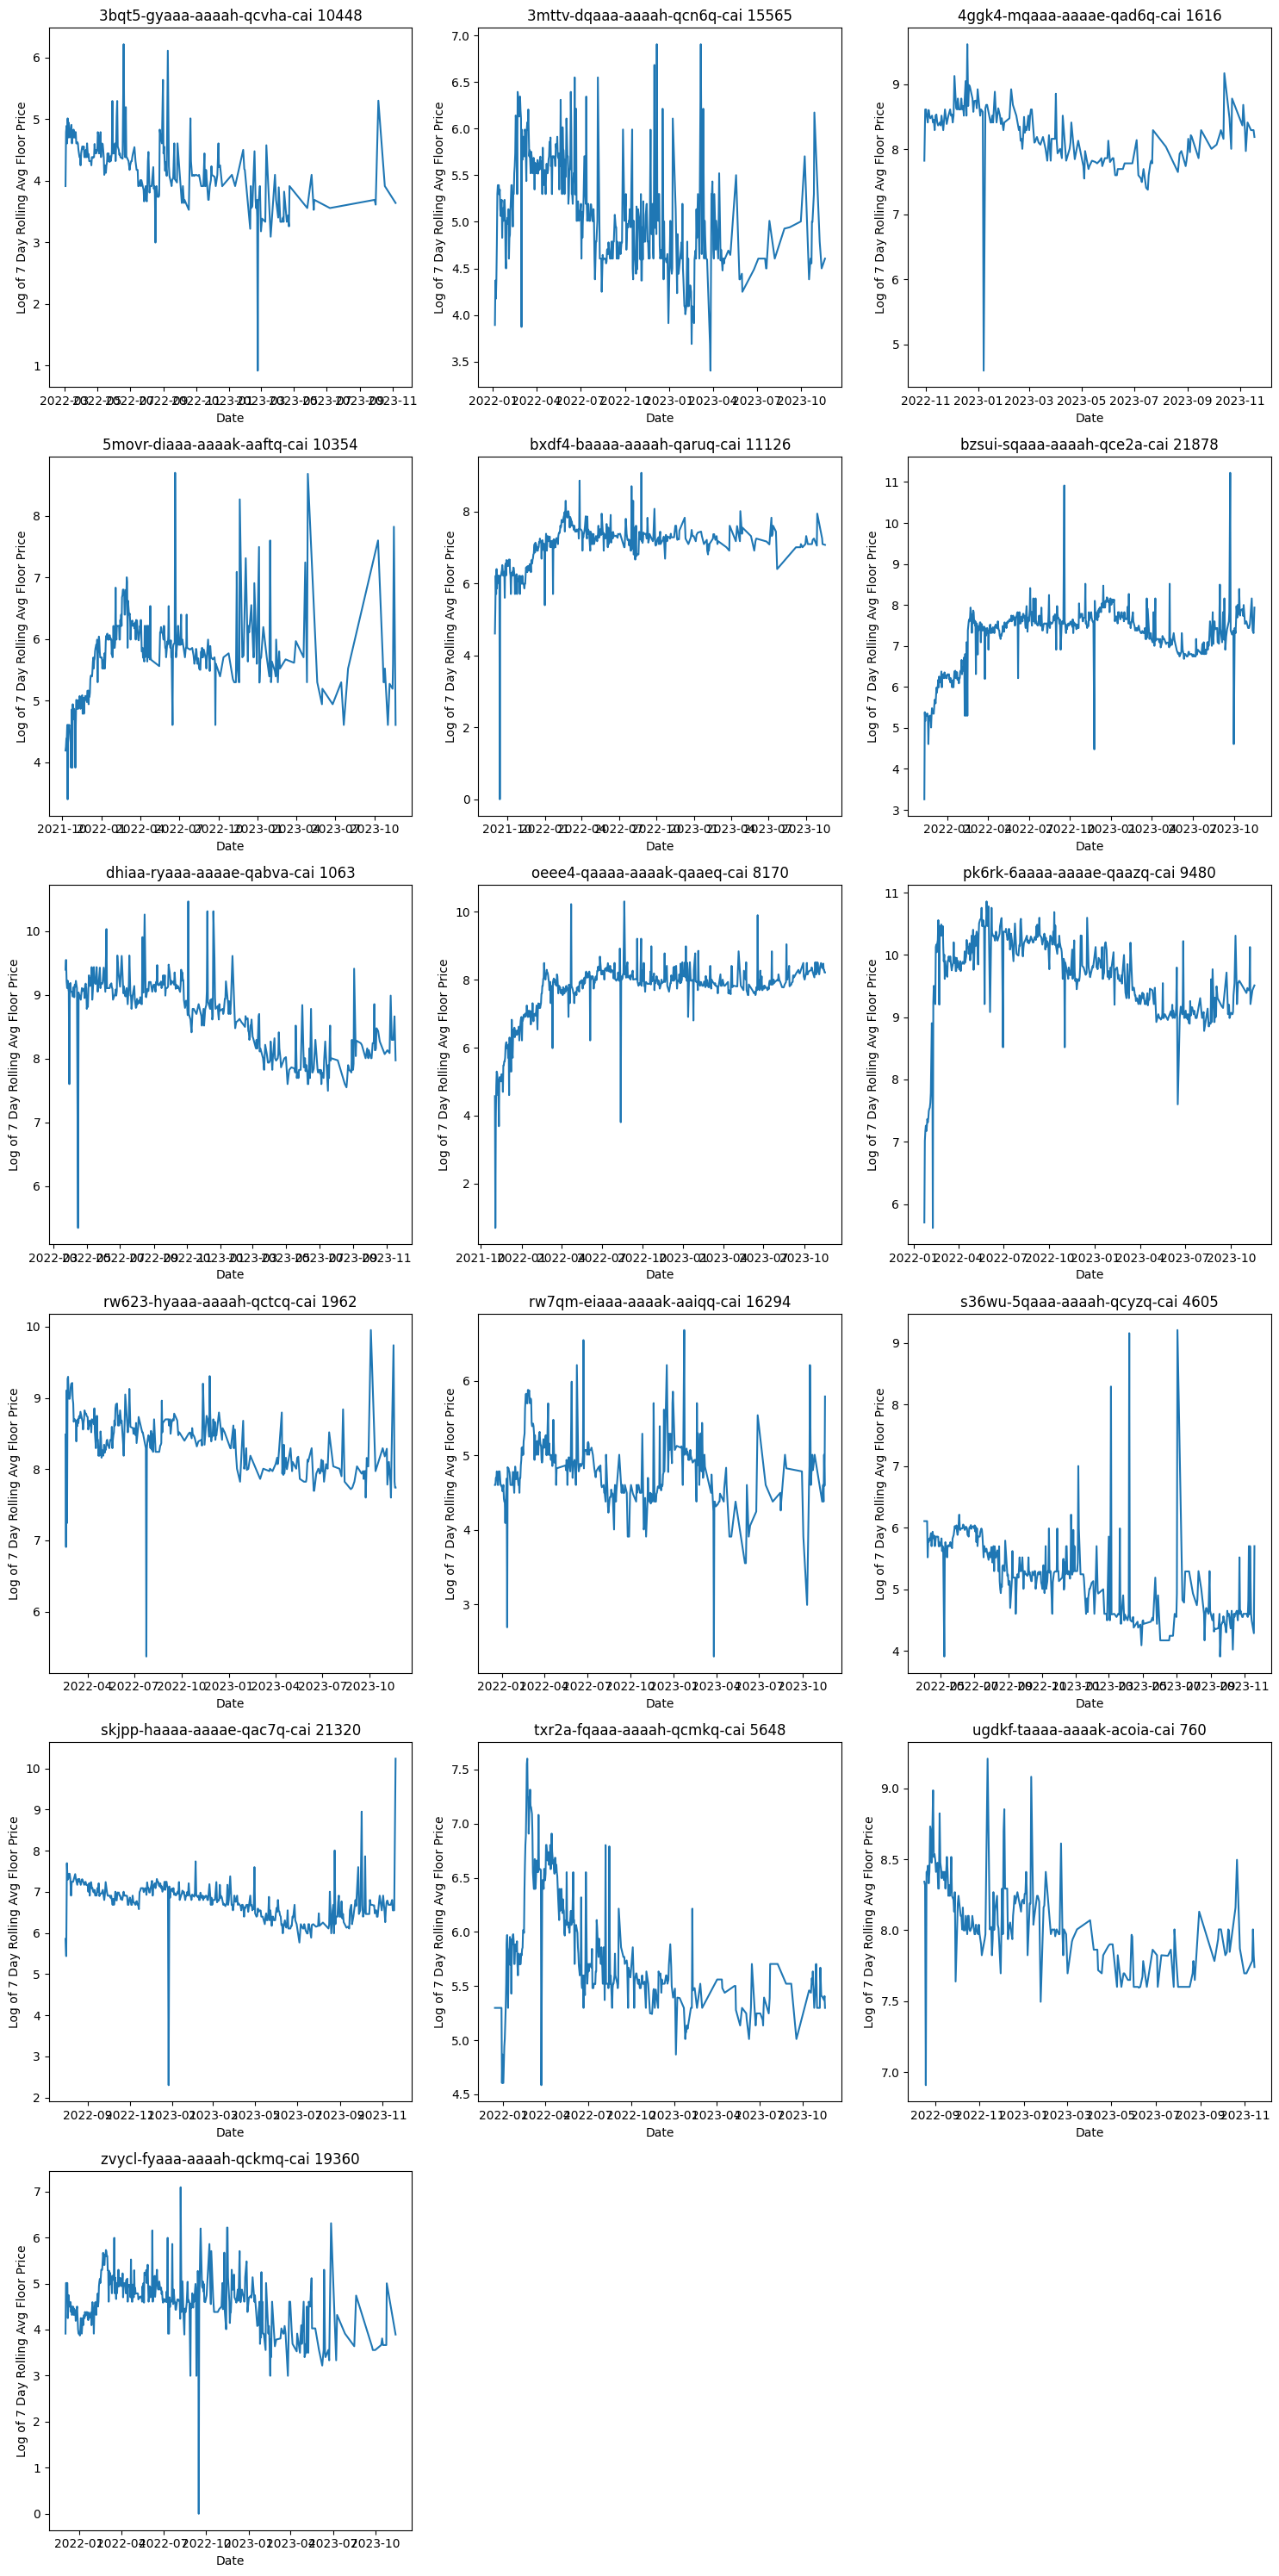

In [193]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming `floor_prices` is your DataFrame
collections = floor_prices['collection'].unique()
num_collections = len(collections)

# Determine grid size
cols = 3
rows = (num_collections // cols) + (num_collections % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for idx, collection in enumerate(collections):
    ax = axes[idx]
    collection_data = floor_prices[floor_prices['collection'] == collection].set_index('date')[f'{days}_day_rolling_avg_floor_price']
    ax.plot(np.log(collection_data))
    ax.set_title(collection + ' '+str(len(sales_with_rarity[sales_with_rarity.collection ==collection])))
    ax.set_xlabel('Date')
    ax.set_ylabel('Log of 7 Day Rolling Avg Floor Price')

# Remove any empty subplots
for i in range(num_collections, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


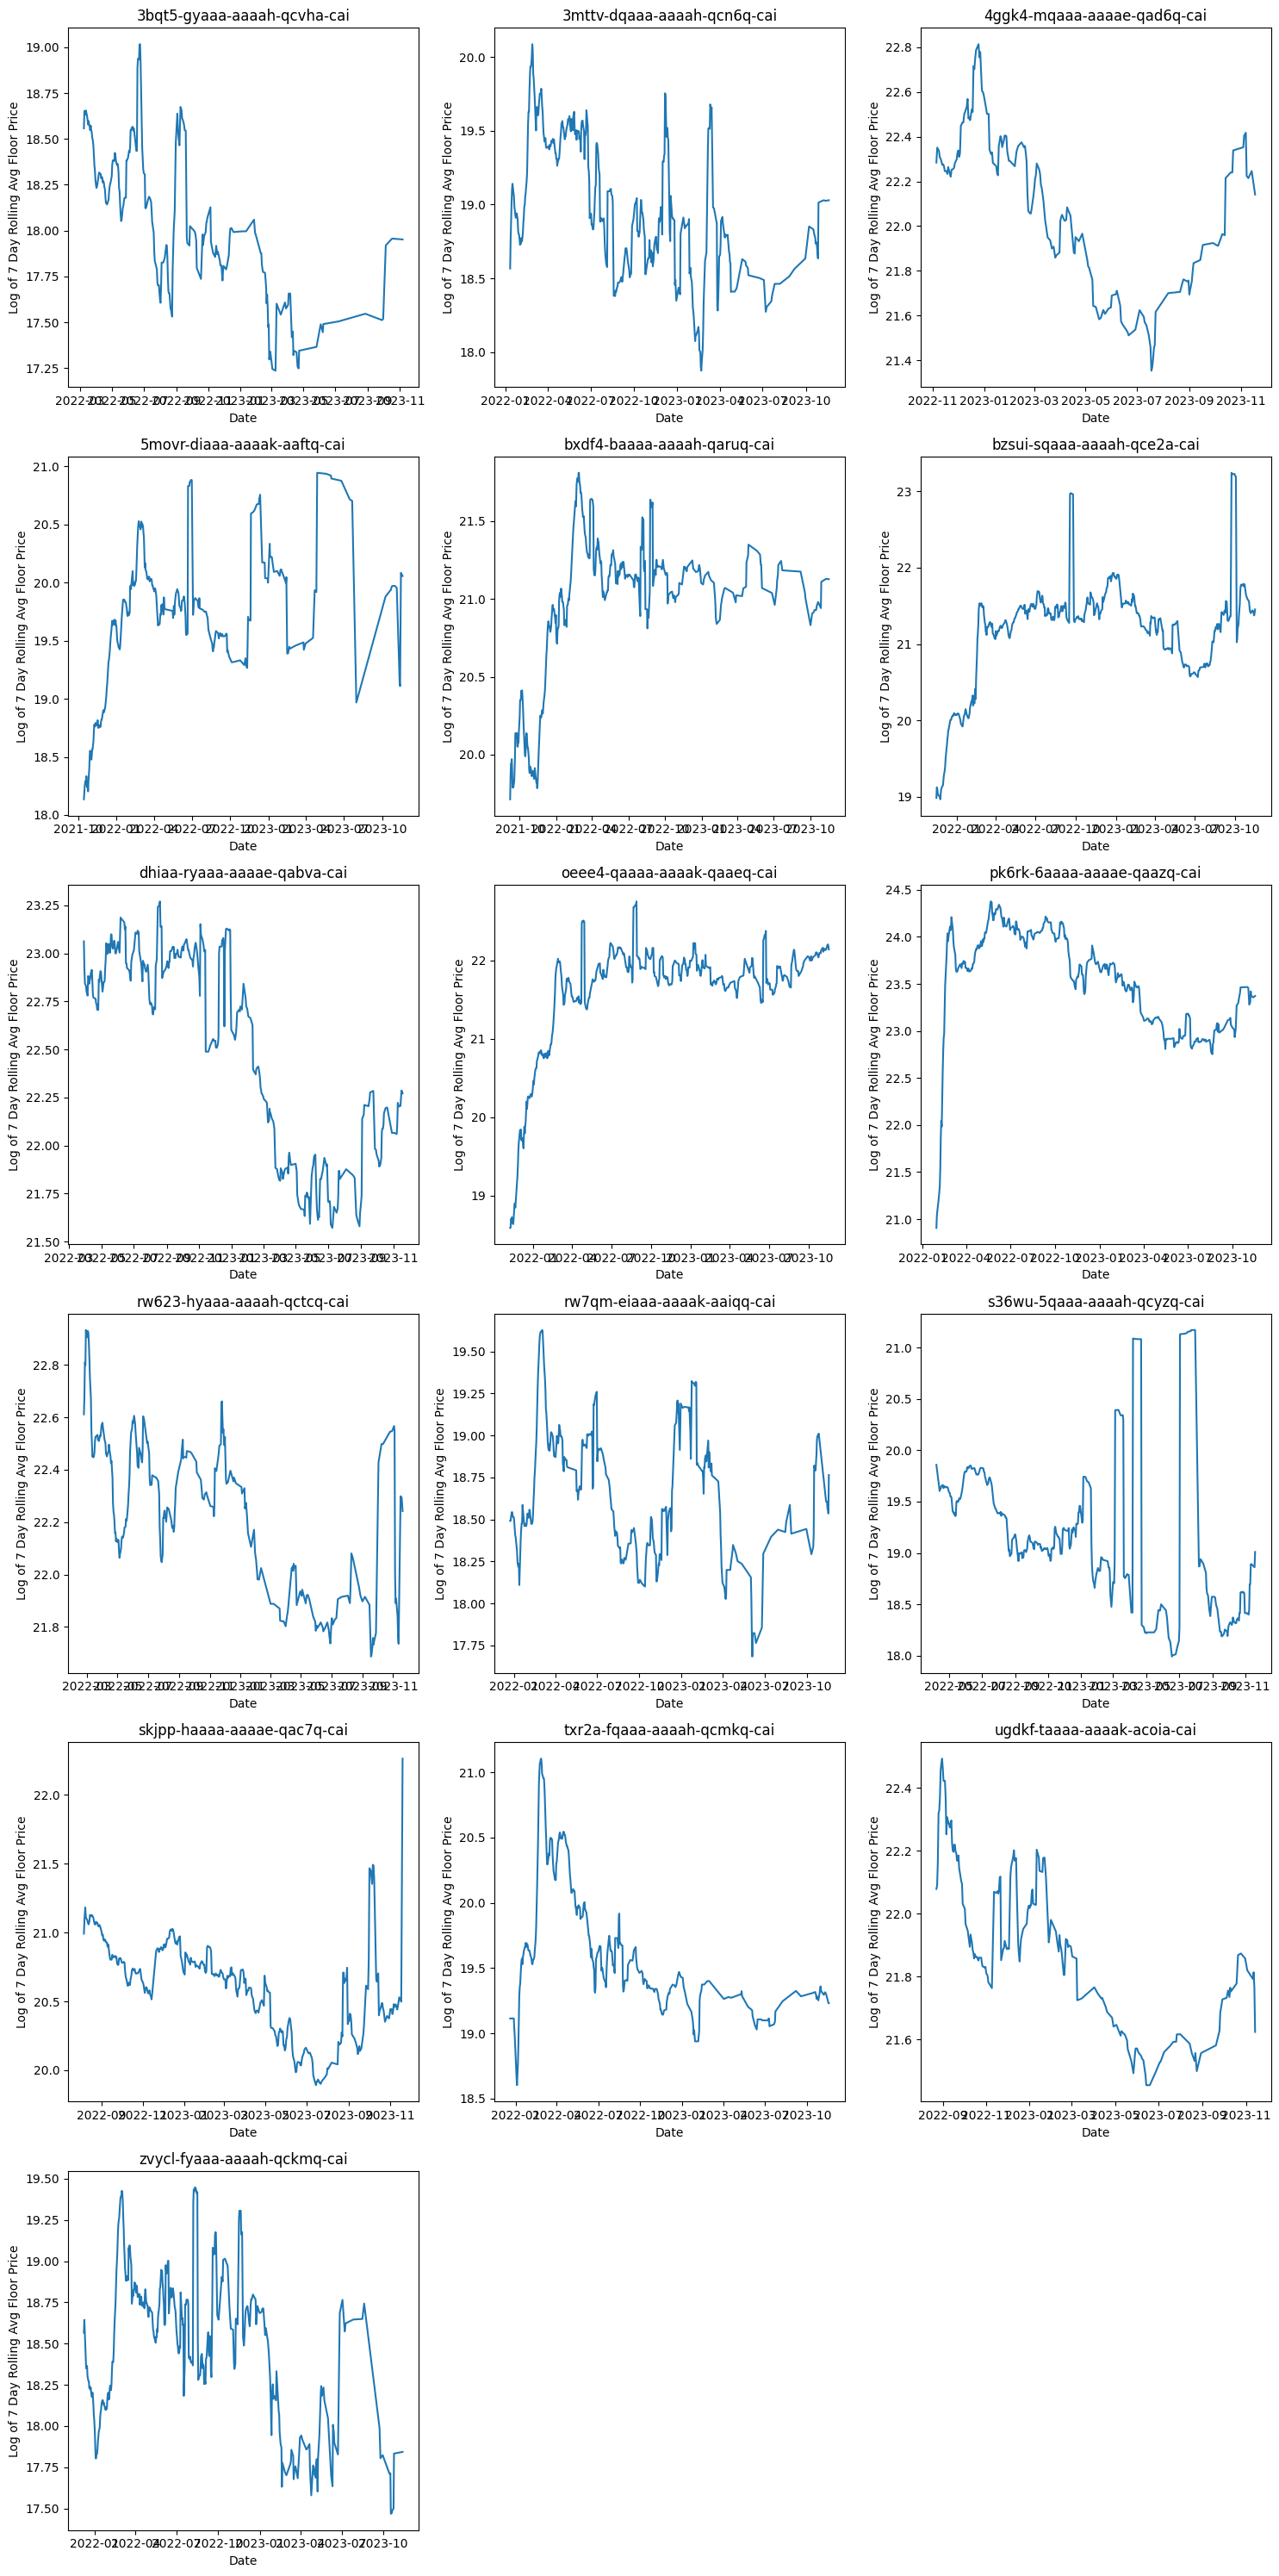

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming `floor_prices` is your DataFrame
collections = floor_prices['collection'].unique()
num_collections = len(collections)

# Determine grid size
cols = 3
rows = (num_collections // cols) + (num_collections % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for idx, collection in enumerate(collections):
    ax = axes[idx]
    collection_data = floor_prices[floor_prices['collection'] == collection].set_index('date')['7_day_rolling_avg_floor_price']
    ax.plot(np.log(collection_data))
    ax.set_title(collection)
    ax.set_xlabel('Date')
    ax.set_ylabel('Log of 7 Day Rolling Avg Floor Price')

# Remove any empty subplots
for i in range(num_collections, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [140]:
import tensorflow as tf
from tensorflow import keras
import tf2onnx  # For ONNX conversion
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

training_data = sales_with_rarity.copy()
X = training_data[['rank', 'times_above_floor']].values
y = training_data['price'].values
print(X)
print(y)

# Build the TensorFlow Model
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=[2])  # Simple linear regression with one feature
])
model.compile(optimizer='adam', loss='mean_squared_error')
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train, epochs=100, verbose=0)  # You can adjust epochs as needed


# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# # Convert the Model to ONNX
# # Define input and output names for ONNX
# input_signature = [tf.TensorSpec((None, 1), tf.float32, name='input')]
# output_signature = [tf.TensorSpec((None, 1), tf.float32, name='output')]
# model.output_names=['output']

[[2.00000000e+00 1.00000000e+00]
 [2.00000000e+00 1.00000000e+00]
 [1.50000000e+01 2.25000000e+00]
 ...
 [9.99700000e+03 2.44897959e+00]
 [9.99800000e+03 2.04081633e+00]
 [9.99800000e+03 6.32911392e+00]]
[150000000 150000000 180000000 ... 120000000 200000000 500000000]


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step


In [150]:
import tensorflow as tf
from tensorflow import keras
import tf2onnx  # For ONNX conversion
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming sales_with_rarity is your DataFrame
training_data = sales_with_rarity.copy()
# X = training_data[['rank', 'times_above_floor']].values
X = training_data[['rank', 'times_above_floor']].values
y = training_data['price'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Build the improved TensorFlow Model
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=[2], activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Adding Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop], verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and the actual values to original scale
y_pred = scaler_y.inverse_transform(y_pred).flatten()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Convert the Model to ONNX
# Define input and output names for ONNX
# input_signature = [tf.TensorSpec((None, 2), tf.float32, name='input')]
# output_signature = [tf.TensorSpec((None, 1), tf.float32, name='output')]

# model_proto, _ = tf2onnx.convert.from_keras(model, input_signature, output_signature)
# with open("model.onnx", "wb") as f:
#     f.write(model_proto.SerializeToString())


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


998/998 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step
RMSE: 3638236164.324116


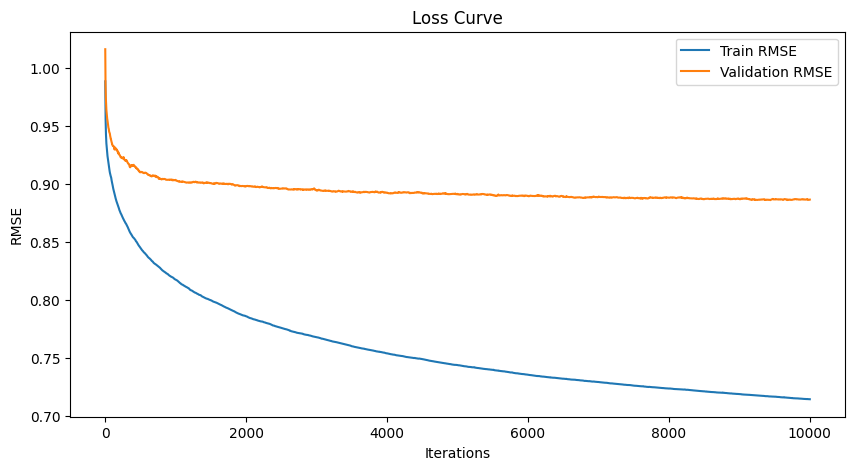

RMSE: 3467756341.3068933


In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

# Assuming sales_with_rarity is your DataFrame
training_data = sales_with_rarity.copy()
X = training_data[['rank', 'times_above_floor']].values
y = training_data['price'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Dictionary to hold evaluation results
evals_result = {}

# Train the model
model = lgb.train(params, train_data, num_boost_round=10000, valid_sets=[train_data, test_data], callbacks=[lgb.record_evaluation(evals_result)])

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(evals_result['training']['rmse'], label='Train RMSE')
plt.plot(evals_result['valid_1']['rmse'], label='Validation RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Inverse transform the predictions and the actual values to original scale
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


In [201]:
training_data[['rank', f'{days}_day_rolling_avg_floor_price']]

array([[ 0.83925753, -0.55812716],
       [ 1.09716235,  1.37886588],
       [-0.11691088, -0.20928482],
       ...,
       [-0.54663793,  0.09365722],
       [-1.52441273, -0.83352902],
       [-0.12960035,  0.73626155]])

zvycl-fyaaa-aaaah-qckmq-cai


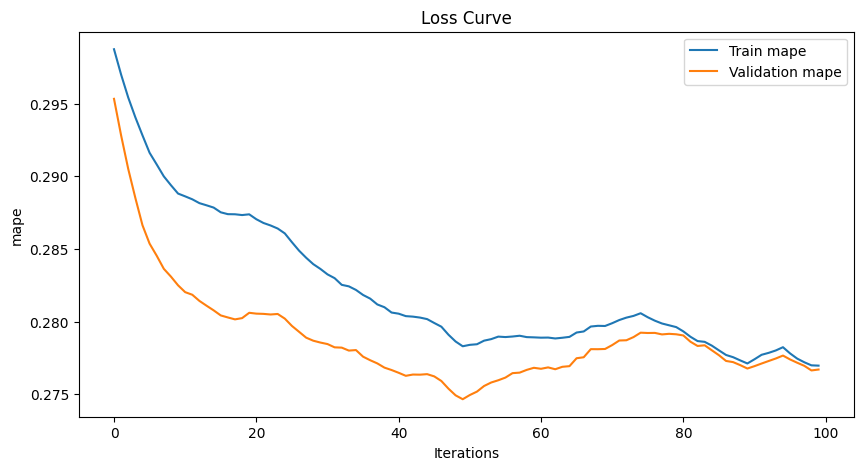

mape: 1.040004530823127
rw7qm-eiaaa-aaaak-aaiqq-cai


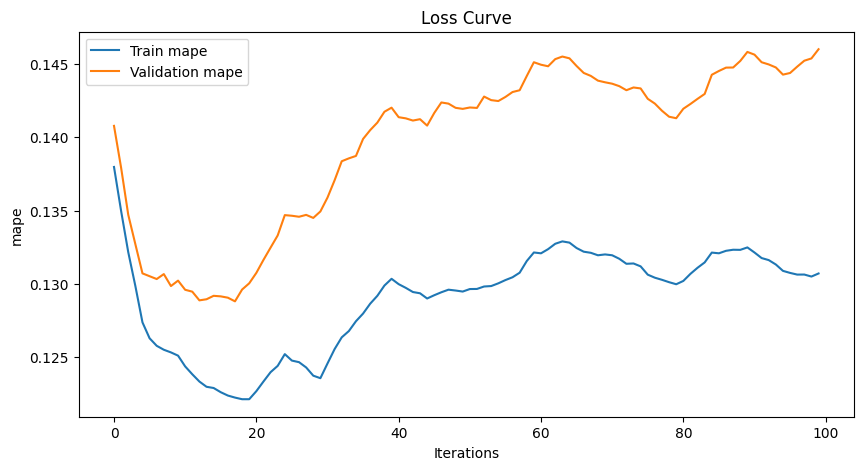

mape: 0.9423948978688144
3bqt5-gyaaa-aaaah-qcvha-cai


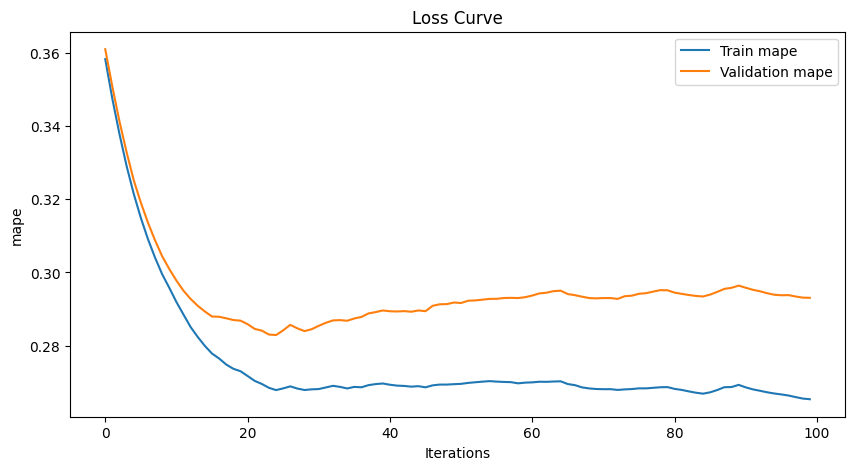

mape: 1.6986748686579656
4ggk4-mqaaa-aaaae-qad6q-cai


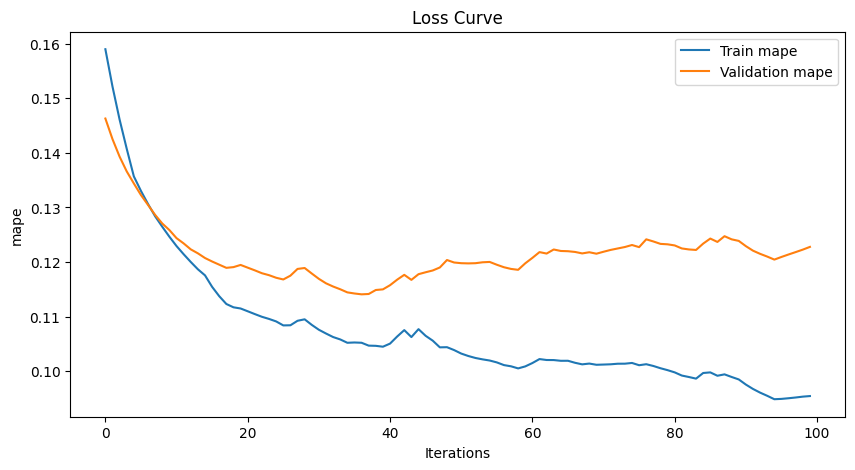

mape: 0.8356333885345428
pk6rk-6aaaa-aaaae-qaazq-cai


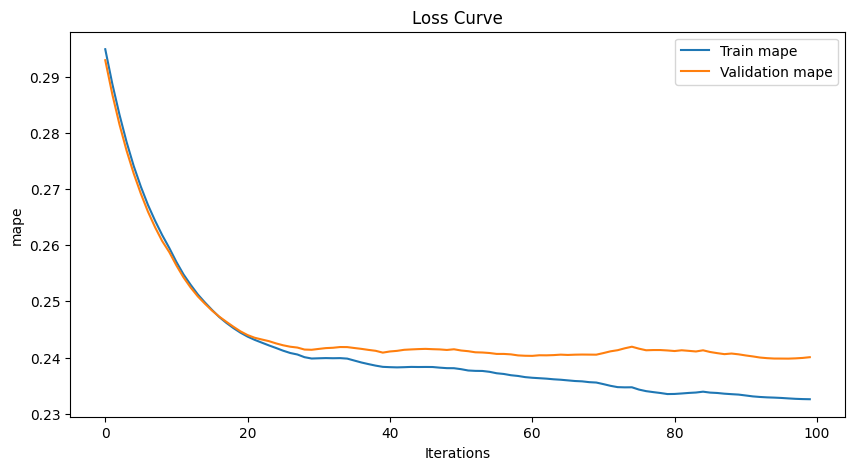

mape: 0.5922430724079991
bxdf4-baaaa-aaaah-qaruq-cai


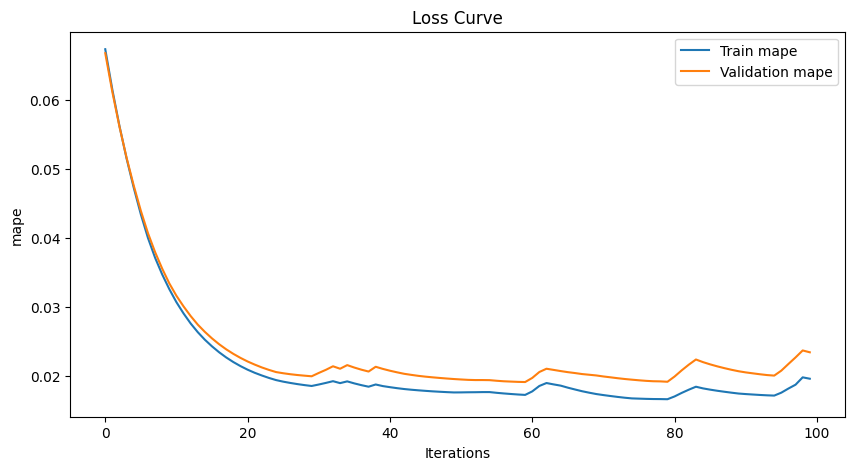

mape: 1.0179698152025765
skjpp-haaaa-aaaae-qac7q-cai


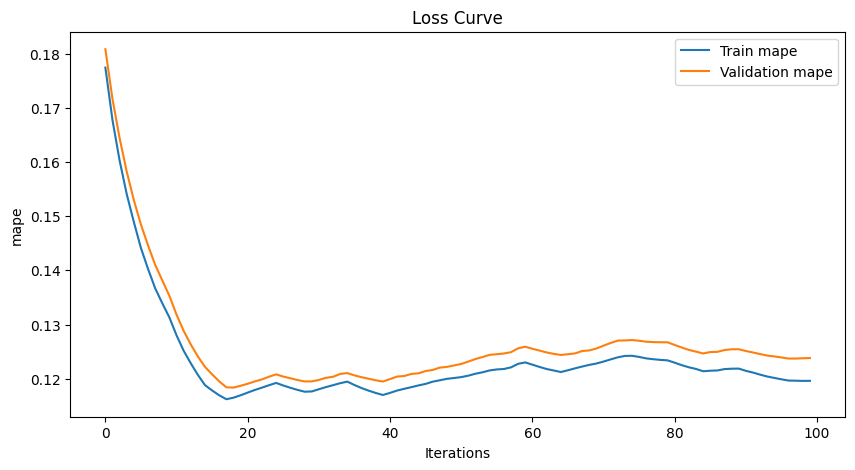

mape: 0.6053356501436935
rw623-hyaaa-aaaah-qctcq-cai


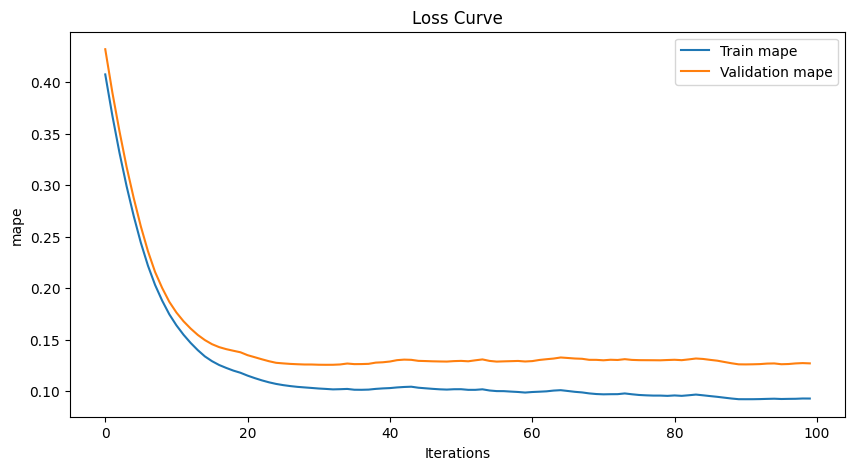

mape: 0.5444267189798228
bzsui-sqaaa-aaaah-qce2a-cai


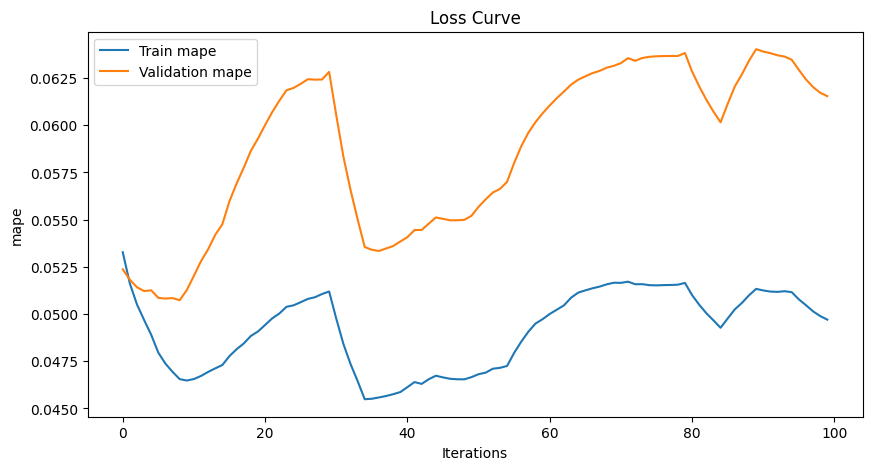

mape: 1.2086499650724574
ugdkf-taaaa-aaaak-acoia-cai
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

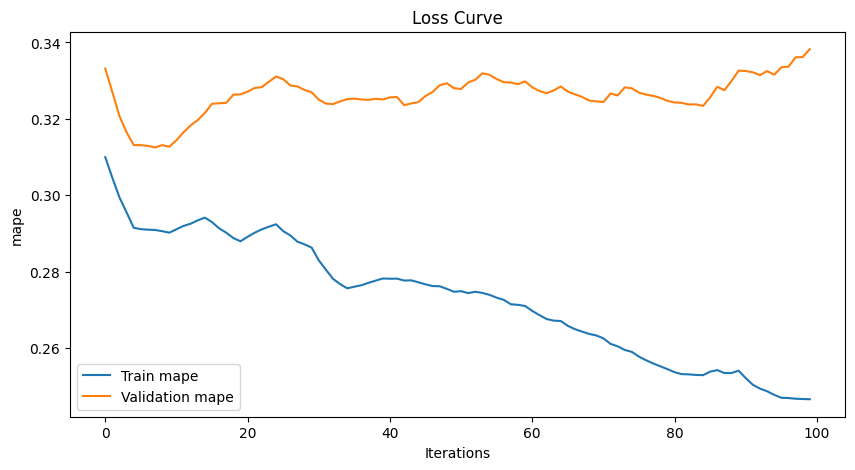

mape: 0.4603035289463703
dhiaa-ryaaa-aaaae-qabva-cai
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

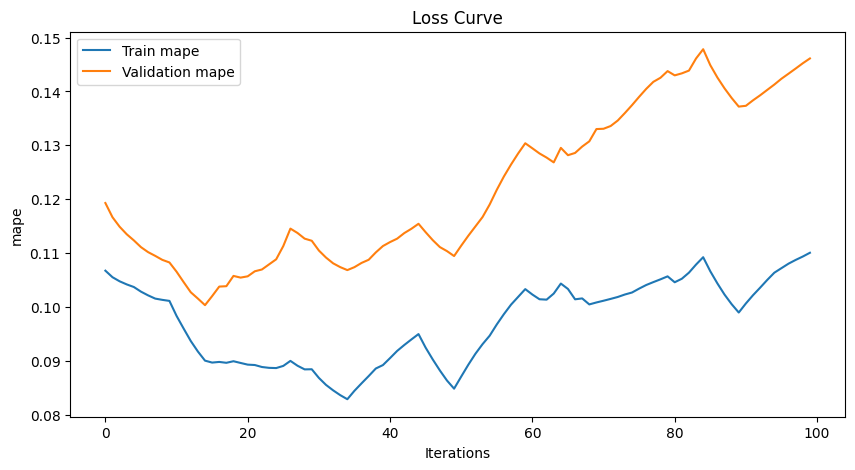

mape: 0.6381958533927568
s36wu-5qaaa-aaaah-qcyzq-cai


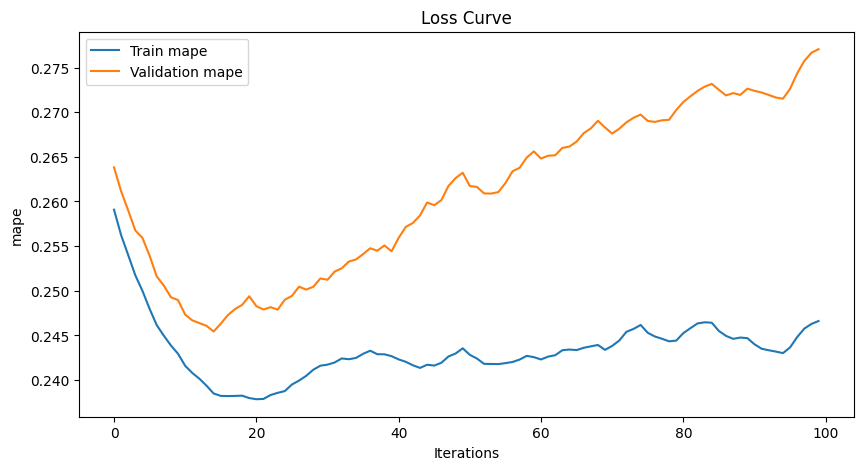

mape: 1.030681793296796
5movr-diaaa-aaaak-aaftq-cai


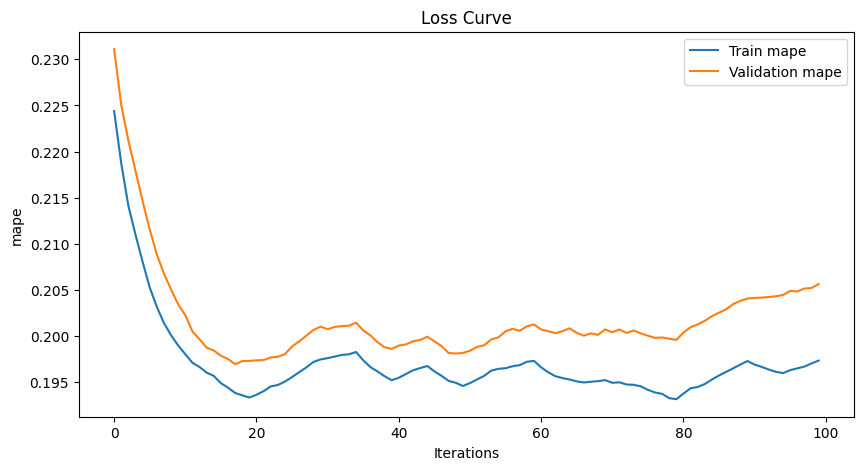

mape: 0.8245103388601954
oeee4-qaaaa-aaaak-qaaeq-cai


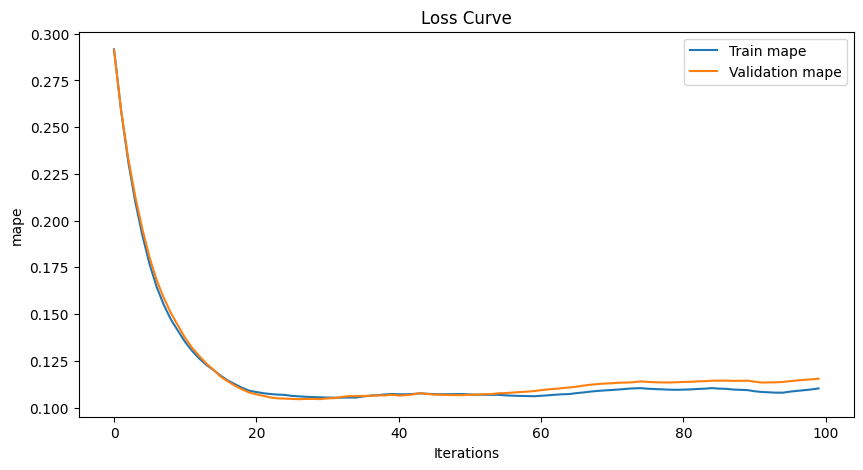

mape: 0.9818474552187759
txr2a-fqaaa-aaaah-qcmkq-cai


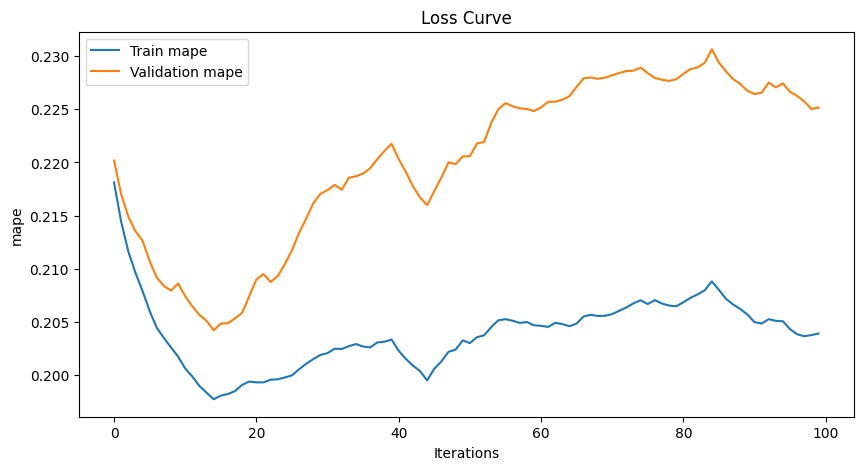

mape: 0.6365227919745271
3mttv-dqaaa-aaaah-qcn6q-cai


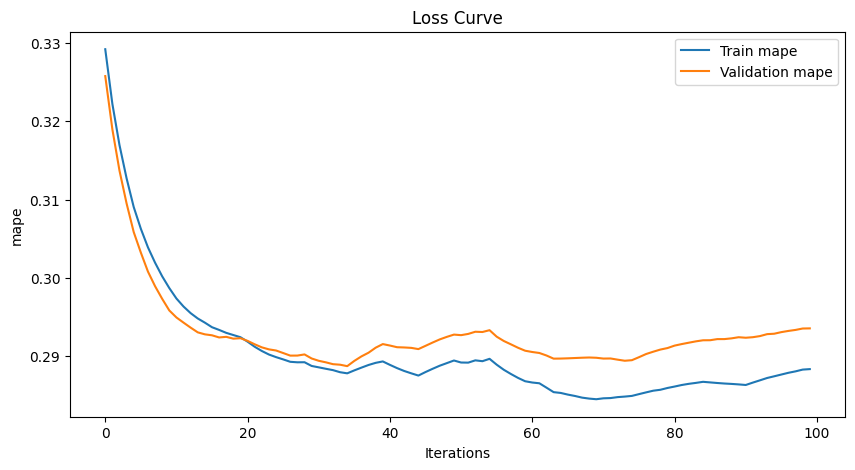

mape: 0.8766617946093267


In [197]:
results = {}
for col in sales_with_rarity.collection.unique():
    sales = sales_with_rarity[sales_with_rarity.collection ==col]
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_absolute_percentage_error
    import lightgbm as lgb

    # Assuming sales_with_rarity is your DataFrame
    print(col)
    training_data = sales.copy()
    X = training_data[['rank', f'{days}_day_rolling_avg_floor_price']].values
    y = training_data['times_above_floor'].values

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    scaler_y = StandardScaler()
    y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
    y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

    # Create the LightGBM dataset
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    # Set parameters for LightGBM
    params = {
        'objective': 'regression',
        'metric': 'mape',
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,
        'num_leaves': 31,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbose': 0
    }

    # Dictionary to hold evaluation results
    evals_result = {}

    # Train the model
    model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[train_data, test_data], callbacks=[lgb.record_evaluation(evals_result)])

    # Plot the loss curve
    plt.figure(figsize=(10, 5))
    plt.plot(evals_result['training']['mape'], label='Train mape')
    plt.plot(evals_result['valid_1']['mape'], label='Validation mape')
    plt.xlabel('Iterations')
    plt.ylabel('mape')
    plt.title('Loss Curve')
    plt.legend()
    plt.show()

    # Make predictions
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    # Inverse transform the predictions and the actual values to original scale
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

    # Calculate mape
    mape = np.sqrt(mean_absolute_percentage_error(y_test, y_pred))
    print(f"mape: {mape}")
    results[col] = mape

In [202]:
from sklearn.metrics import median_absolute_percentage_error

ImportError: cannot import name 'median_absolute_percentage_error' from 'sklearn.metrics' (/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

In [309]:
results = {}
# for col in sales_with_rarity.collection.unique():
for col in ['rw623-hyaaa-aaaah-qctcq-cai', # og medals
            'ugdkf-taaaa-aaaak-acoia-cai', # mokoto mesh
       '4ggk4-mqaaa-aaaae-qad6q-cai', #icp flower
       'skjpp-haaaa-aaaae-qac7q-cai', # Pineapple Punks
       'pk6rk-6aaaa-aaaae-qaazq-cai', # btc flower 
       'dhiaa-ryaaa-aaaae-qabva-cai', # eth flower
       'bxdf4-baaaa-aaaah-qaruq-cai', # icpunks
       '3mttv-dqaaa-aaaah-qcn6q-cai', # Dfinity Space Apes
         'oeee4-qaaaa-aaaak-qaaeq-cai']: #Motoko Ghosts

    sales = sales_with_rarity[sales_with_rarity.collection ==col]
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_absolute_percentage_error
    import lightgbm as lgb

    # Assuming sales_with_rarity is your DataFrame
    print(col)
    training_data = sales.copy()
    X = training_data[['rank', f'{days}_day_rolling_avg_floor_price']].values
    y = training_data['times_above_floor'].values

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    scaler_y = StandardScaler()
    y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
    y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

    # Create the LightGBM dataset
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    # Set parameters for LightGBM
    params = {
      'objective': 'regression',
      'metric': 'mape',
      'boosting_type': 'gbdt',
      'learning_rate': 0.05,  # Reduced learning rate
      # 'num_leaves': 15,  # Reduced number of leaves
      'feature_fraction': 0.8,  # Slightly reduced feature fraction
      'bagging_fraction': 0.7,  # Slightly reduced bagging fraction
      'bagging_freq': 5,
      'min_data_in_leaf': 20,  # Minimum number of data in one leaf
      'reg_alpha': 0.1,  # L1 regularization term
      'reg_lambda': 0.1,  # L2 regularization term
      'verbose': 0
  }

    # Dictionary to hold evaluation results
    evals_result = {}

    # Train the model
    model = lgb.train(params, train_data, num_boost_round=10000, valid_sets=[train_data, test_data], callbacks=[lgb.record_evaluation(evals_result)])

    # Plot the loss curve
    plt.figure(figsize=(10, 5))
    plt.plot(evals_result['training']['mape'], label='Train mape')
    plt.plot(evals_result['valid_1']['mape'], label='Validation mape')
    plt.xlabel('Iterations')
    plt.ylabel('mape')
    plt.title('Loss Curve')
    plt.legend()
    plt.show()

    # Make predictions
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    # Inverse transform the predictions and the actual values to original scale
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

    # Calculate mape
    mape = np.sqrt(mean_absolute_percentage_error(y_test, y_pred))
    x = pd.DataFrame()
    x['y_pred'] = y_pred
    x['y_test'] = y_test
    median_error= (((x.y_pred/x.y_test)-1).abs()).median()

    print(f"mape: {mape}", round(median_error,2))
    results[col] = round(median_error,2)

rw623-hyaaa-aaaah-qctcq-cai
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

KeyboardInterrupt: 

In [259]:
x = pd.DataFrame()
x['y_pred'] = y_pred
x['y_test'] = y_test
median_error= (((x.y_pred/x.y_test)-1).abs()).median()

print(f"mape: {mape}", round(median_error,2))

mape: 3.6251280617023833 13.84


In [308]:
(pd.DataFrame([results]).T.sort_values(by =0)*100).mean().values[0]

32.0

In [217]:
pd.DataFrame([results]).T.sort_values(by =0).index

Index(['rw623-hyaaa-aaaah-qctcq-cai', 'ugdkf-taaaa-aaaak-acoia-cai',
       '4ggk4-mqaaa-aaaae-qad6q-cai', 'skjpp-haaaa-aaaae-qac7q-cai',
       'txr2a-fqaaa-aaaah-qcmkq-cai', 'pk6rk-6aaaa-aaaae-qaazq-cai',
       'dhiaa-ryaaa-aaaae-qabva-cai', 'bxdf4-baaaa-aaaah-qaruq-cai',
       '5movr-diaaa-aaaak-aaftq-cai', 'bzsui-sqaaa-aaaah-qce2a-cai',
       'rw7qm-eiaaa-aaaak-aaiqq-cai', '3mttv-dqaaa-aaaah-qcn6q-cai',
       'zvycl-fyaaa-aaaah-qckmq-cai', 'oeee4-qaaaa-aaaak-qaaeq-cai',
       's36wu-5qaaa-aaaah-qcyzq-cai', '3bqt5-gyaaa-aaaah-qcvha-cai'],
      dtype='object')

In [228]:
(pd.DataFrame([results]).T.sort_values(by =0)*100).mean().values[0]

30.555555555555557

In [273]:
(pd.DataFrame([results]).T.sort_values(by =0))*100

,0
ugdkf-taaaa-aaaak-acoia-cai,13.0
rw623-hyaaa-aaaah-qctcq-cai,15.0
skjpp-haaaa-aaaae-qac7q-cai,22.0
4ggk4-mqaaa-aaaae-qad6q-cai,23.0
dhiaa-ryaaa-aaaae-qabva-cai,25.0
pk6rk-6aaaa-aaaae-qaazq-cai,29.0
bxdf4-baaaa-aaaah-qaruq-cai,33.0
3mttv-dqaaa-aaaah-qcn6q-cai,57.0
oeee4-qaaaa-aaaak-qaaeq-cai,60.0


In [177]:
pd.DataFrame([results]).T.sort_values(by =0)

,0
ugdkf-taaaa-aaaak-acoia-cai,0.766929
pk6rk-6aaaa-aaaae-qaazq-cai,1.517235
rw623-hyaaa-aaaah-qctcq-cai,1.843293
skjpp-haaaa-aaaae-qac7q-cai,3.004825
txr2a-fqaaa-aaaah-qcmkq-cai,3.592864
4ggk4-mqaaa-aaaae-qad6q-cai,3.970797
s36wu-5qaaa-aaaah-qcyzq-cai,4.193176
5movr-diaaa-aaaak-aaftq-cai,4.658523
3mttv-dqaaa-aaaah-qcn6q-cai,4.875374
dhiaa-ryaaa-aaaae-qabva-cai,5.066115


In [315]:
sales.collection

46102     4ggk4-mqaaa-aaaae-qad6q-cai
46103     4ggk4-mqaaa-aaaae-qad6q-cai
46104     4ggk4-mqaaa-aaaae-qad6q-cai
46105     4ggk4-mqaaa-aaaae-qad6q-cai
46106     4ggk4-mqaaa-aaaae-qad6q-cai
                     ...             
159644    3mttv-dqaaa-aaaah-qcn6q-cai
159645    3mttv-dqaaa-aaaah-qcn6q-cai
159646    3mttv-dqaaa-aaaah-qcn6q-cai
159647    3mttv-dqaaa-aaaah-qcn6q-cai
159648    3mttv-dqaaa-aaaah-qcn6q-cai
Name: collection, Length: 71062, dtype: object

In [328]:
training_data.columns

Index(['rank', 'Token ID', 'Rarity Score', 'canisterId', 'nftName', 'tokenId',
       'tokenIdentifier', 'imageUrlTemplate', 's3Url', 'isIframe', 'TxID',
       'price', 'groupNum', 'from', 'to', 'txType', 'timestamp', 'date',
       '1_day_rolling_avg_floor_price', 'times_above_floor',
       'collection_3mttv-dqaaa-aaaah-qcn6q-cai',
       'collection_4ggk4-mqaaa-aaaae-qad6q-cai',
       'collection_bxdf4-baaaa-aaaah-qaruq-cai',
       'collection_dhiaa-ryaaa-aaaae-qabva-cai',
       'collection_oeee4-qaaaa-aaaak-qaaeq-cai',
       'collection_pk6rk-6aaaa-aaaae-qaazq-cai',
       'collection_rw623-hyaaa-aaaah-qctcq-cai',
       'collection_skjpp-haaaa-aaaae-qac7q-cai',
       'collection_ugdkf-taaaa-aaaak-acoia-cai'],
      dtype='object')

In [325]:
collection_names

['rw623-hyaaa-aaaah-qctcq-cai',
 'ugdkf-taaaa-aaaak-acoia-cai',
 '4ggk4-mqaaa-aaaae-qad6q-cai',
 'skjpp-haaaa-aaaae-qac7q-cai',
 'pk6rk-6aaaa-aaaae-qaazq-cai',
 'dhiaa-ryaaa-aaaae-qabva-cai',
 'bxdf4-baaaa-aaaah-qaruq-cai',
 '3mttv-dqaaa-aaaah-qcn6q-cai',
 'oeee4-qaaaa-aaaak-qaaeq-cai']

rw623-hyaaa-aaaah-qctcq-cai
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

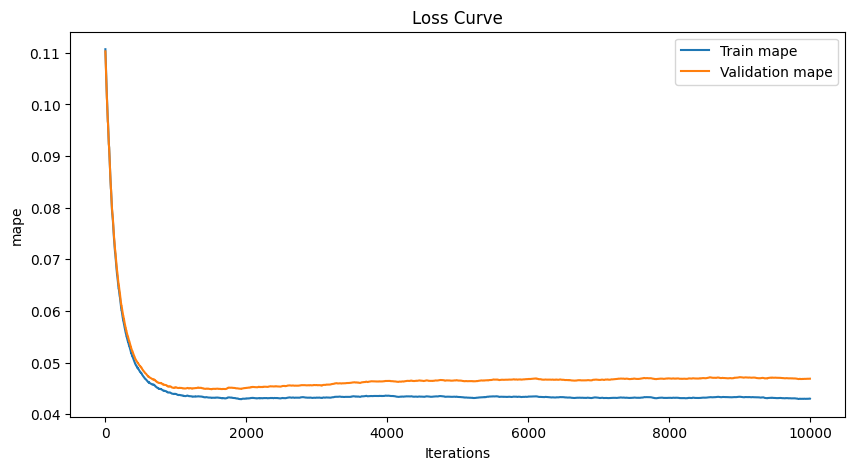

mape: 0.8276121760333516 0.35


In [350]:
results = {}
# for col in sales_with_rarity.collection.unique():
collection_names  = [
    
    'rw623-hyaaa-aaaah-qctcq-cai', # og medals
    'ugdkf-taaaa-aaaak-acoia-cai', # mokoto mesh
    '4ggk4-mqaaa-aaaae-qad6q-cai', #icp flower
    'skjpp-haaaa-aaaae-qac7q-cai', # Pineapple Punks
    'pk6rk-6aaaa-aaaae-qaazq-cai', # btc flower 
    'dhiaa-ryaaa-aaaae-qabva-cai', # eth flower
    'bxdf4-baaaa-aaaah-qaruq-cai', # icpunks
    '3mttv-dqaaa-aaaah-qcn6q-cai', # Dfinity Space Apes
    'oeee4-qaaaa-aaaak-qaaeq-cai'] #Motoko Ghosts
import pandas as pd

# Assuming sales is your DataFrame and sales.collection is the column you want to convert to dummy variables
sales = sales_with_rarity[sales_with_rarity.collection.isin(collection_names)]
# Create dummy variables
sales_dummies = pd.get_dummies(sales['collection'])

# Concatenate the dummy variables with the original DataFrame
sales = pd.concat([sales, sales_dummies], axis=1)

# Drop the original collection column if it's no longer needed
sales.drop('collection', axis=1, inplace=True)

# Display the updated DataFrame
sales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import lightgbm as lgb

# Assuming sales_with_rarity is your DataFrame
print(col)
training_data = sales.copy()
X = training_data[['rank', f'{days}_day_rolling_avg_floor_price']+collection_names].values
y = training_data['times_above_floor'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'mape',
    'boosting_type': 'gbdt',
    'learning_rate': 0.005,  # Reduced learning rate
    'num_leaves': 31,  # Reduced number of leaves
    'feature_fraction': 0.8,  # Slightly reduced feature fraction
    'bagging_fraction': 0.7,  # Slightly reduced bagging fraction
    'bagging_freq': 5,
    'min_data_in_leaf': 10,  # Minimum number of data in one leaf
    'reg_alpha': 0.1,  # L1 regularization term
    'reg_lambda': 0.3,  # L2 regularization term
    'verbose': 0
}

# Dictionary to hold evaluation results
evals_result = {}

# Train the model
model = lgb.train(params, train_data, num_boost_round=10000, valid_sets=[train_data, test_data], callbacks=[lgb.record_evaluation(evals_result)])

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(evals_result['training']['mape'], label='Train mape')
plt.plot(evals_result['valid_1']['mape'], label='Validation mape')
plt.xlabel('Iterations')
plt.ylabel('mape')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Inverse transform the predictions and the actual values to original scale
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate mape
mape = np.sqrt(mean_absolute_percentage_error(y_test, y_pred))
x = pd.DataFrame()
x['y_pred'] = y_pred
x['y_test'] = y_test
median_error= (((x.y_pred/x.y_test)-1).abs()).median()

print(f"mape: {mape}", round(median_error,2))
results[col] = round(median_error,2)

<Axes: >

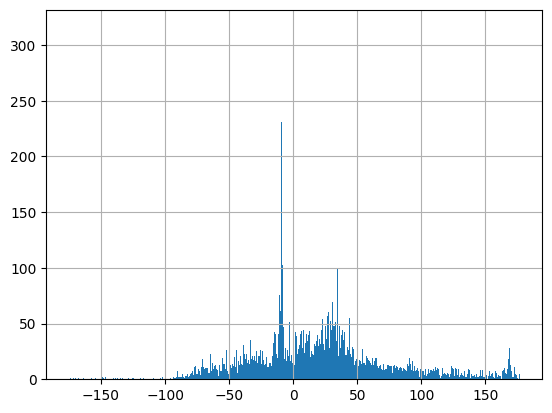

In [351]:
x['error'] = ((x.y_pred/x.y_test)-1)*100
x[x['error'].abs()<x['error'].abs().quantile(0.95)].error.hist(bins=1000)

In [352]:
x['error'] = ((x.y_pred/x.y_test)-1)*100
x[x['error'].abs()<x['error'].abs().quantile(0.95)].error.hist(bins=1000)
(pd.DataFrame([results]).T.sort_values(by =0)*100).mean().values[0]


35.0

In [394]:
training_data[['rank', f'{days}_day_rolling_avg_floor_price']+collection_names]

,rank,1_day_rolling_avg_floor_price,rw623-hyaaa-aaaah-qctcq-cai,ugdkf-taaaa-aaaak-acoia-cai,4ggk4-mqaaa-aaaae-qad6q-cai,skjpp-haaaa-aaaae-qac7q-cai,pk6rk-6aaaa-aaaae-qaazq-cai,dhiaa-ryaaa-aaaae-qabva-cai,bxdf4-baaaa-aaaah-qaruq-cai,3mttv-dqaaa-aaaah-qcn6q-cai,oeee4-qaaaa-aaaak-qaaeq-cai
46102,0,3300.0,0,0,1,0,0,0,0,0,0
46103,0,5500.0,0,0,1,0,0,0,0,0,0
46104,0,3300.0,0,0,1,0,0,0,0,0,0
46105,0,5500.0,0,0,1,0,0,0,0,0,0
46106,8,2500.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
159644,9997,210.0,0,0,0,0,0,0,0,1,0
159645,9997,220.0,0,0,0,0,0,0,0,1,0
159646,9997,49.0,0,0,0,0,0,0,0,1,0
159647,9998,98.0,0,0,0,0,0,0,0,1,0


In [1]:
import tensorflow as tf
from tensorflow import keras
import tf2onnx  # For ONNX conversion
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

results = {}
collection_names  = [
    'rw623-hyaaa-aaaah-qctcq-cai', # og medals
    'ugdkf-taaaa-aaaak-acoia-cai', # mokoto mesh
    '4ggk4-mqaaa-aaaae-qad6q-cai', #icp flower
    'skjpp-haaaa-aaaae-qac7q-cai', # Pineapple Punks
    'pk6rk-6aaaa-aaaae-qaazq-cai', # btc flower 
    'dhiaa-ryaaa-aaaae-qabva-cai', # eth flower
    'bxdf4-baaaa-aaaah-qaruq-cai', # icpunks
    '3mttv-dqaaa-aaaah-qcn6q-cai', # Dfinity Space Apes
    'oeee4-qaaaa-aaaak-qaaeq-cai'] #Motoko Ghosts
import pandas as pd

sales = sales_with_rarity[sales_with_rarity.collection.isin(collection_names)]
sales_dummies = pd.get_dummies(sales['collection'])
sales = pd.concat([sales, sales_dummies], axis=1)
sales.drop('collection', axis=1, inplace=True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import lightgbm as lgb

# Assuming sales_with_rarity is your DataFrame
print(col)
training_data = sales.copy()
X = training_data[['rank', f'{days}_day_rolling_avg_floor_price']+collection_names].values
y = training_data['times_above_floor'].values

# Split the data

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale the data
# scaler_X = StandardScaler()
# X_train = scaler_X.fit_transform(X_train)
# X_test = scaler_X.transform(X_test)

# scaler_y = StandardScaler()
# y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
# y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Build the improved TensorFlow Model
model = keras.Sequential([
    keras.layers.Dense(1024, input_shape=[X.shape[1]], activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])


# Compile the model with a different optimizer and learning rate
# optimizer = 

# model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='mean_squared_error')


# Adding Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stop], verbose=0)

# Plotting the training loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and the actual values to original scale
y_pred = scaler_y.inverse_transform(y_pred).flatten()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
x = pd.DataFrame()
x['y_pred'] = y_pred
x['y_test'] = y_test
x['error'] = ((x.y_pred/x.y_test)-1)*100
print(x['error'].abs().median())
x[x['error'].abs()<x['error'].abs().quantile(0.95)].error.hist(bins=1000)


# Convert the Model to ONNX
# Define input and output names for ONNX
# input_signature = [tf.TensorSpec((None, 2), tf.float32, name='input')]
# output_signature = [tf.TensorSpec((None, 1), tf.float32, name='output')]

# model_proto, _ = tf2onnx.convert.from_keras(model, input_signature, output_signature)
# with open("model.onnx", "wb") as f:
#     f.write(model_proto.SerializeToString())


NameError: name 'sales_with_rarity' is not defined

In [392]:
y

array([1.        , 1.2       , 1.        , ..., 2.44897959, 2.04081633,
       6.32911392])

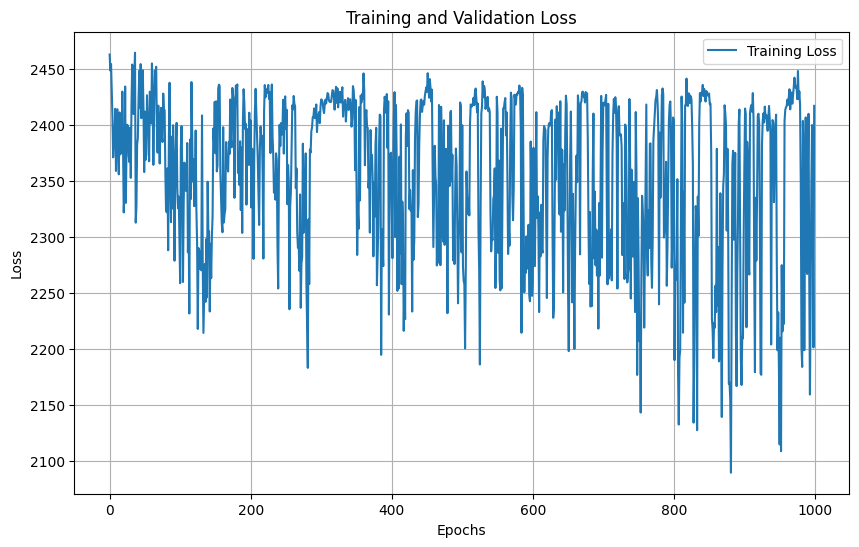

In [402]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tf2onnx  # For ONNX conversion
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = training_data[['rank',
 '1_day_rolling_avg_floor_price',
 'rw623-hyaaa-aaaah-qctcq-cai',
 'ugdkf-taaaa-aaaak-acoia-cai',
 '4ggk4-mqaaa-aaaae-qad6q-cai',
 'skjpp-haaaa-aaaae-qac7q-cai',
 'pk6rk-6aaaa-aaaae-qaazq-cai',
 'dhiaa-ryaaa-aaaae-qabva-cai',
 'bxdf4-baaaa-aaaah-qaruq-cai',
 '3mttv-dqaaa-aaaah-qcn6q-cai',
 'oeee4-qaaaa-aaaak-qaaeq-cai']].values
y = training_data['times_above_floor'].values

# Split the data

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Build the improved TensorFlow Model
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=[X.shape[1]], activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Adding Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stop], verbose=0)

# Plotting the training loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and the actual values to original scale
y_pred = scaler_y.inverse_transform(y_pred).flatten()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
x = pd.DataFrame()
x['y_pred'] = y_pred
x['y_test'] = y_test
x['error'] = ((x.y_pred/x.y_test)-1)*100
print(x['error'].abs().median())
x[x['error'].abs()<x['error'].abs().quantile(0.95)].error.hist(bins=1000)


# Convert the Model to ONNX
# Define input and output names for ONNX
# input_signature = [tf.TensorSpec((None, 2), tf.float32, name='input')]
# output_signature = [tf.TensorSpec((None, 1), tf.float32, name='output')]

# model_proto, _ = tf2onnx.convert.from_keras(model, input_signature, output_signature)
# with open("model.onnx", "wb") as f:
#     f.write(model_proto.SerializeToString())


In [382]:
X = training_data[['rank',
 '1_day_rolling_avg_floor_price',
 'rw623-hyaaa-aaaah-qctcq-cai',
 'ugdkf-taaaa-aaaak-acoia-cai',
 '4ggk4-mqaaa-aaaae-qad6q-cai',
 'skjpp-haaaa-aaaae-qac7q-cai',
 'pk6rk-6aaaa-aaaae-qaazq-cai',
 'dhiaa-ryaaa-aaaae-qabva-cai',
 'bxdf4-baaaa-aaaah-qaruq-cai',
 '3mttv-dqaaa-aaaah-qcn6q-cai',
 'oeee4-qaaaa-aaaak-qaaeq-cai']].values
y = training_data['times_above_floor'].values

,rank,1_day_rolling_avg_floor_price,rw623-hyaaa-aaaah-qctcq-cai,ugdkf-taaaa-aaaak-acoia-cai,4ggk4-mqaaa-aaaae-qad6q-cai,skjpp-haaaa-aaaae-qac7q-cai,pk6rk-6aaaa-aaaae-qaazq-cai,dhiaa-ryaaa-aaaae-qabva-cai,bxdf4-baaaa-aaaah-qaruq-cai,3mttv-dqaaa-aaaah-qcn6q-cai,oeee4-qaaaa-aaaak-qaaeq-cai,times_above_floor
46102,0,3300.0,0,0,1,0,0,0,0,0,0,1.000000
46103,0,5500.0,0,0,1,0,0,0,0,0,0,1.200000
46104,0,3300.0,0,0,1,0,0,0,0,0,0,1.000000
46105,0,5500.0,0,0,1,0,0,0,0,0,0,1.200000
46106,8,2500.0,0,0,1,0,0,0,0,0,0,2.840000
...,...,...,...,...,...,...,...,...,...,...,...,...
159644,9997,210.0,0,0,0,0,0,0,0,1,0,1.261905
159645,9997,220.0,0,0,0,0,0,0,0,1,0,1.272727
159646,9997,49.0,0,0,0,0,0,0,0,1,0,2.448980
159647,9998,98.0,0,0,0,0,0,0,0,1,0,2.040816


In [385]:
training_data[['rank',
 '1_day_rolling_avg_floor_price',
 'rw623-hyaaa-aaaah-qctcq-cai',
 'ugdkf-taaaa-aaaak-acoia-cai',
 '4ggk4-mqaaa-aaaae-qad6q-cai',
 'skjpp-haaaa-aaaae-qac7q-cai',
 'pk6rk-6aaaa-aaaae-qaazq-cai',
 'dhiaa-ryaaa-aaaae-qabva-cai',
 'bxdf4-baaaa-aaaah-qaruq-cai',
 '3mttv-dqaaa-aaaah-qcn6q-cai',
 'oeee4-qaaaa-aaaak-qaaeq-cai','times_above_floor']].to_csv('training_data.csv')

In [364]:
y_pred

array([1.5283657, 0.8909999, 9.000642 , ..., 2.1337364, 4.60082  ,
       2.1199434], dtype=float32)

In [379]:
print(x['error'].abs().median())


85.22645235061643


In [ ]:
(pd.DataFrame([results]).T.sort_values(by =0)*100).mean().values[0]

In [355]:
y_train

array([-0.06434361, -0.07828182, -0.09380391, ..., -0.10710856,
       -0.10311717, -0.10336663])

In [142]:
4261887922.067551/rmse

1.0000781724407029

In [141]:
rmse

4261554785.9287457

In [11]:
data = sales_with_rarity[sales_with_rarity.canisterId == 'pk6rk-6aaaa-aaaae-qaazq-cai']

In [14]:
data[['rank', 'price']]

,rank,price
47718,0,12000000000
47719,0,500000000
47720,0,12000000000
47721,0,500000000
47722,1,11500000000
...,...,...
57193,2007,500000000
57194,2008,1500000000
57195,2008,500000000
57196,2008,1500000000


In [16]:
!pip3.11 install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.0 MB/s eta 0:00:00a 0:00:01


In [29]:
data['rank'].replace(0, 1)

47718       1
47719       1
47720       1
47721       1
47722       1
         ... 
57193    2007
57194    2008
57195    2008
57196    2008
57197    2008
Name: rank, Length: 9480, dtype: int64

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Split the data into features and target variable
training_data = data.copy()
# training_data['rank'] = training_data['rank'].replace(0, 1)
# training_data['rank'] = np.log(training_data['rank'])
X = training_data[['rank']]
y = training_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    # 'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    # 'XGBoost': XGBRegressor(random_state=42),
    # 'LightGBM': LGBMRegressor(random_state=42)
}

# Train and evaluate the models
rmse_scores = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store the RMSE
    rmse_scores[model_name] = rmse

# Print RMSE scores
for model_name, rmse in rmse_scores.items():
    print(f"{model_name}: RMSE = {rmse:.4f}")


Random Forest: RMSE = 11235549626.7898


In [105]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import onnx
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Step 1: Prepare the data
X = training_data[['rank']].values
y = training_data['price'].values

# Step 2: Create and train the model
model = LinearRegression()
model.fit(X, y)

# Step 3: Convert the model to ONNX format
initial_type = [('float_input', FloatTensorType([None, 1]))]
onnx_model = convert_sklearn(model, initial_types=initial_type)

# Save the ONNX model to a file
with open("linear_regression.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
pd.DataFrame(columns=['rank'], data=[[500]])

In [139]:
X

array([[   0],
       [   0],
       [   0],
       ...,
       [2008],
       [2008],
       [2008]])

<Axes: >

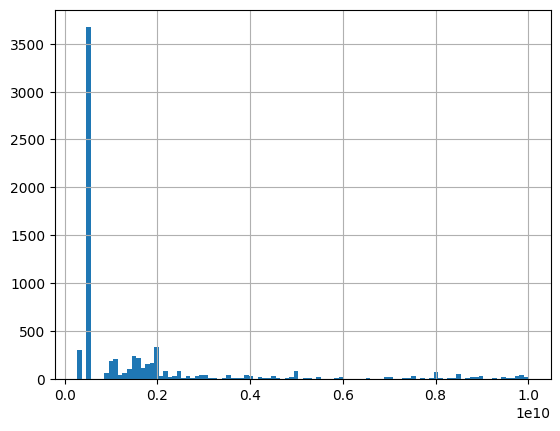

In [137]:
training_data[training_data['price']<10000000000].price.hist(bins=100)

In [140]:
training_data.price.sort_values()

53972       275000000
53976       275000000
56263       300000000
48136       300000000
49541       300000000
             ...     
49280     77700000000
49212    100000000000
49210    100000000000
56240    122200000000
56236    122200000000
Name: price, Length: 9480, dtype: int64

In [129]:
import tensorflow as tf
from tensorflow import keras
import tf2onnx  # For ONNX conversion
import pandas as pd
import numpy as np

# Assuming you already have your training data in a DataFrame called 'training_data'
X = training_data[['rank']].values
y = training_data['price'].values
print(X)
print(y)

# Build the TensorFlow Model
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=[1])  # Simple linear regression with one feature
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
model.fit(X, y, epochs=10, verbose=0)  # You can adjust epochs as needed

# Convert the Model to ONNX
# Define input and output names for ONNX
input_signature = [tf.TensorSpec((None, 1), tf.float32, name='input')]
output_signature = [tf.TensorSpec((None, 1), tf.float32, name='output')]
model.output_names=['output']

# Export to ONNX (Corrected line)
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature, opset=13) 
with open("linear_regression_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())


[[   0]
 [   0]
 [   0]
 ...
 [2008]
 [2008]
 [2008]]
[12000000000   500000000 12000000000 ...   500000000  1500000000
   500000000]


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'


In [130]:
y

array([12000000000,   500000000, 12000000000, ...,   500000000,
        1500000000,   500000000])

In [143]:

model.predict(pd.DataFrame(columns=['rank'], data=[[5000]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[13113.578]], dtype=float32)

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


training_data = data.copy()
X = training_data[['rank']]
y = training_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_name = 'Random Forest' 

model = RandomForestRegressor(random_state=42)
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE = {rmse:.4f}")

RMSE = 11235549626.7898


In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming `data` is already defined and contains the columns 'rank' and 'price'
training_data = data.copy()
X = training_data[['rank']]
y = training_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Make predictions
y_pred = model.predict(X_test).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE = {rmse:.4f}")


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
RMSE = 13335891725.0929


In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tf2onnx
import onnx

# Assuming `data` is already defined and contains the columns 'rank' and 'price'
training_data = data.copy()
X = training_data[['rank']]
y = training_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Make predictions
y_pred = model.predict(X_test).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse:.4f}")

# Convert the model to ONNX format
spec = (tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype),)
output_path = 'model.onnx'
model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, output_path=output_path)

# Load and check the ONNX model
onnx_model = onnx.load(output_path)
onnx.checker.check_model(onnx_model)
print("The model is checked and is valid.")


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
RMSE = 13336257719.3829


AttributeError: 'Sequential' object has no attribute 'output_names'

In [83]:
import pandas as pd
import numpy as np
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your data
# data = pd.read_csv('your_data.csv')

# Assuming `data` is already loaded and is a DataFrame
training_data = data.copy()
X = training_data[['rank']]
y = training_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X and y back for TensorFlow Decision Forests
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Convert the training DataFrame to a TensorFlow dataset
train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='price', task=tfdf.keras.Task.REGRESSION)

# Define the model
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)

# Train the model
model.fit(train_dataset)

# Convert the testing DataFrame to a TensorFlow dataset
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_df.drop(columns=['price']), task=tfdf.keras.Task.REGRESSION)

# Make predictions
y_pred = model.predict(test_dataset)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse:.4f}")
test = tfdf.keras.pd_dataframe_to_tf_dataset(pd.DataFrame(columns=['price', 'rank'], data=[[10, 500]]).drop(columns=['price']), task=tfdf.keras.Task.REGRESSION)
x = model.predict(test)
print(X)
# Convert the model to ONNX format
import onnx
import tf2onnx

# Define the path to save the ONNX model
onnx_model_path = "model.onnx"

# Convert the Keras model to ONNX
spec = (tf.TensorSpec((None, X_train.shape[1]), tf.float32, name="input"),)
output_path = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13, output_path=onnx_model_path)

print(f"Model saved to {onnx_model_path}")


Use /var/folders/vs/v2spybcx4wz_xfk2dbj37g0c0000gn/T/tmp59gmcg84 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.073016. Found 7584 examples.
Training model...
Model trained in 0:00:00.427315
Compiling model...


[INFO 24-06-13 08:05:35.0453 CEST kernel.cc:1233] Loading model from path /var/folders/vs/v2spybcx4wz_xfk2dbj37g0c0000gn/T/tmp59gmcg84/model/ with prefix 67c00ae28d3d437f
[INFO 24-06-13 08:05:35.1929 CEST decision_forest.cc:734] Model loaded with 300 root(s), 146364 node(s), and 1 input feature(s).
[INFO 24-06-13 08:05:35.1929 CEST abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-06-13 08:05:35.1930 CEST kernel.cc:1061] Use fast generic engine


Model compiled.
2/2 [==============================] - 0s 13ms/step
RMSE = 13120764450.5249
1/1 [==============================] - 0s 18ms/step
       rank
47718     0
47719     0
47720     0
47721     0
47722     1
...     ...
57193  2007
57194  2008
57195  2008
57196  2008
57197  2008

[9480 rows x 1 columns]
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
ERROR:tf2onnx.tf_loader:Could not find table resource to replace placeholder random_forest_model_4/89599
ERROR:tf2onnx.tfonnx:Tensorflow op [random_forest_model_4/StatefulPartitionedCall/inference_op: SimpleMLInferenceOpWithHandle] is not supported
ERROR:tf2onnx.tfonnx:Unsupported ops: Counter({'SimpleMLInferenceOpWithHandle': 1})


Model saved to model.onnx


In [95]:
y_pred
# ).isna().sum()

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [82]:
test = tfdf.keras.pd_dataframe_to_tf_dataset(pd.DataFrame(columns=['price', 'rank'], data=[[10, 500]]).drop(columns=['price']), task=tfdf.keras.Task.REGRESSION)
x = model.predict(test)
x

1/1 [==============================] - 0s 27ms/step


array([[5.6107725e+08]], dtype=float32)

In [66]:
(tf.TensorSpec((None, X_train.shape[1]), tf.float32, name="input"),)

(TensorSpec(shape=(None, 1), dtype=tf.float32, name='input'),)

In [61]:
# Convert the model to ONNX format
import onnx
import tf2onnx

# Define the path to save the ONNX model
onnx_model_path = "model.onnx"

# Convert the Keras model to ONNX
spec = (tf.TensorSpec((None, X_train.shape[1]), tf.float32, name="input"),)
output_path = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13, output_path=onnx_model_path)

print(f"Model saved to {onnx_model_path}")


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
ERROR:tf2onnx.tf_loader:Could not find table resource to replace placeholder random_forest_model_3/88925
ERROR:tf2onnx.tfonnx:Tensorflow op [random_forest_model_3/StatefulPartitionedCall/inference_op: SimpleMLInferenceOpWithHandle] is not supported
ERROR:tf2onnx.tfonnx:Unsupported ops: Counter({'SimpleMLInferenceOpWithHandle': 1})


Model saved to model.onnx


In [62]:
X_test['y_pred'] = y_pred
X_test['y_test'] = y_test


In [63]:
y_test.min()

300000000

<Axes: xlabel='y_test', ylabel='y_pred'>

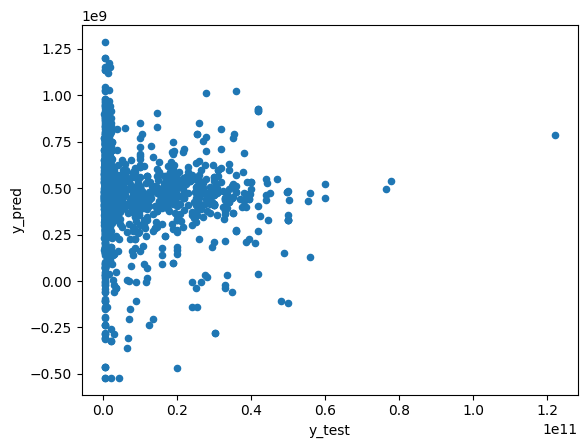

In [64]:
X_test[['y_pred', 'y_test']].plot(kind='scatter', x= 'y_test', y = 'y_pred')

<Axes: >

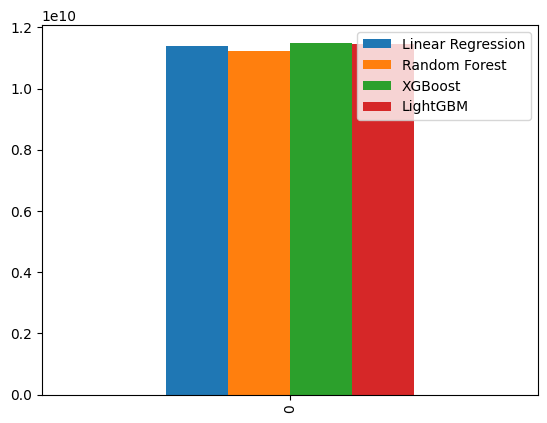

In [32]:
pd.DataFrame([rmse_scores]).plot(kind='bar')

In [ ]:
Linear Regression: RMSE = 11395097181.3316
Random Forest: RMSE = 11235549626.7898
XGBoost: RMSE = 11502246752.4344
LightGBM: RMSE = 11450931230.9253

<Axes: >

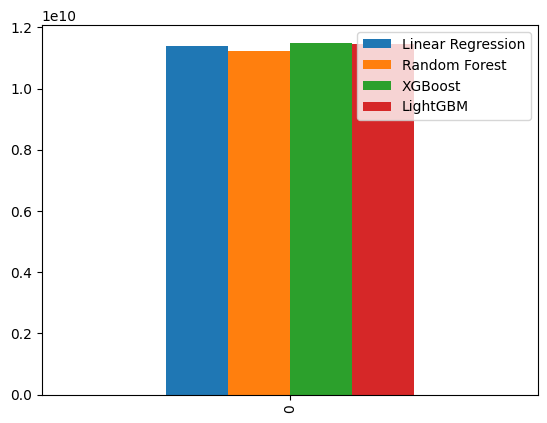

In [22]:
pd.DataFrame([rmse_scores]).plot(kind='bar')